# Setup and Config

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd "/content/drive/MyDrive/<path to uploaded repo>"

/content/drive/MyDrive/Documents/2022.2_PD_Group 02


In [3]:
# Import visual libraries
import os
import matplotlib.pyplot as plt
import seaborn as sns

# Parallel Programming

In [12]:
#@title Compile and run
# Compile
! mpicc ParallelDLA.c -lm -o ParallelDLA.out

# Run with number process == 8
! mpirun --allow-run-as-root --oversubscribe -np $8 ParallelDLA.out

Start process 2
Start process 4
Start process 3
Start process 5
Start process 7
Start process 0
Start process 1
Start process 6
Process 4, output path: output/parallel/4.txt
Process 3, output path: output/parallel/3.txt
Process 5, output path: output/parallel/5.txt
Process 0, output path: output/parallel/0.txt
Process 1, output path: output/parallel/1.txt
Process 6, output path: output/parallel/6.txt
Process 2, output path: output/parallel/2.txt
Process 7, output path: output/parallel/7.txt
Process 1, exporting output to: output/parallel/1.txt
Process 3, exporting output to: output/parallel/3.txt
Process 5, exporting output to: output/parallel/5.txt
Process 4, exporting output to: output/parallel/4.txt
Process 0, exporting output to: output/parallel/0.txt
Process 6, exporting output to: output/parallel/6.txt
Process 7, exporting output to: output/parallel/7.txt
Process 2, exporting output to: output/parallel/2.txt


Appending 0.txt
Appending 1.txt
Appending 2.txt
Appending 3.txt
Appending 4.txt
Appending 5.txt
Appending 6.txt
Appending 7.txt


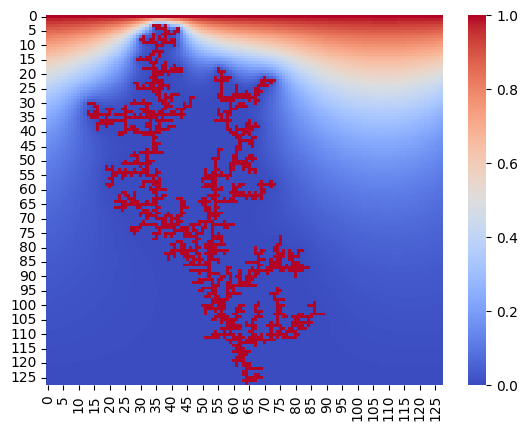

In [13]:
#@title Display the output
# Output concatenation
results = []
for f in sorted(os.listdir('output/parallel')):
    if ".txt" not in f:
      continue
    print(f"Appending {f}")
    lines = open(os.path.join('output', 'parallel', f), 'r').readlines()
    for line in lines:
        results.append([float(x) for x in line.split('\t')[:-1]])

# Visualization by heatmap
heatMap = sns.heatmap(results, cmap='coolwarm')

# Save heatmap
plt.savefig('output/parallel/DLA-heatmap.png', format='png')

# Sequential Programming


In [24]:
#@title Compile and run
!g++ SequentialDLA.cpp -o SequentialDLA.out

In [25]:
%%shell
./SequentialDLA.out

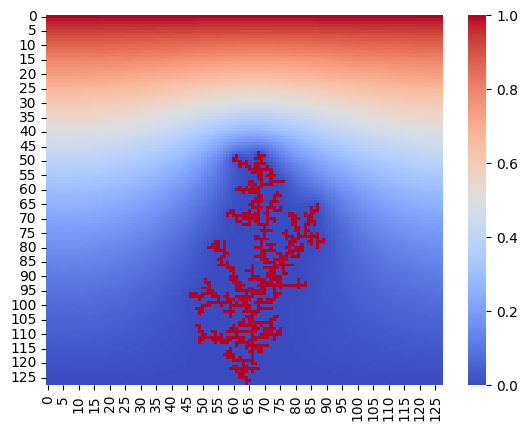

In [26]:
#@title Display the output
lines = open("output/sequential/out.txt", 'r').readlines()
results = dict()
result = []
start_idx = 0
for idx in range(len(lines)):
    if "Output" in lines[idx]:
        start_idx = idx + 1

for idx in range(start_idx, len(lines)):
    result.append([float(x) for x in lines[idx].split('\t')[:-1]])

# Visualization by heatmap
heatMap = sns.heatmap(result, cmap='coolwarm')

# Save heatmap
plt.savefig('output/sequential/DLA-heatmap.png', format='png')